## Problem Statement

Predict the total ride duration of taxi trips in the New York City.

## Hypothesis

1. Does the trip duration decrease on the weekend?
2. Is trip duration affected by the time of the day?
3. Is the trip duration longer for some locations?
4. Does the day of the week affects the trip duration?
5. Is trip duration correlated with the distance between the locations?
6. Does vendor id affects the trip duration?
7. Does the trip duration increase in the evening?
8. Is the trip duration different for the different months?



## Data Cleaning

In [128]:
## Data Cleaning

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
import haversine as hs
taxi_trip_df = pd.read_csv('nyc_taxi_trip_duration.csv')
taxi_trip_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [129]:
taxi_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [130]:
## Converting pickup_datetime and dropoff_datetime columns to "datetime"
taxi_trip_df['pickup_datetime'] = pd.to_datetime(taxi_trip_df['pickup_datetime'])
taxi_trip_df['dropoff_datetime'] = pd.to_datetime(taxi_trip_df['dropoff_datetime'])
taxi_trip_df['trip_duration'] = (taxi_trip_df['trip_duration']/(60*60)).round(3)
## Checking whether there are duplicate rows in the dataframe
taxi_trip_df.duplicated().sum()


0

In [131]:
taxi_trip_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,0.111
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,0.306
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,0.454
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,0.317
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,0.236



#### The dataset contains 729322 rows and 11 columns with no missing and duplicate values. We have converted the variable "pickup_datetime" and "dropoff_datetime" to datetime.

# Exploratory Analysis

### Calculate the distance between Longitudes and Latitudes

In [132]:
## Exploratory Analysis

def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM 
    return km


In [133]:
taxi_trip_df['distance']  = haversine_vectorize(taxi_trip_df['pickup_longitude'],taxi_trip_df['pickup_latitude'],taxi_trip_df['dropoff_longitude'],
                   taxi_trip_df['dropoff_latitude'])
taxi_trip_df




,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,0.111,1.198320
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,0.306,4.126519
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,0.454,7.246201
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,0.317,2.359615
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,0.236,4.325816
...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,0.082,1.119520
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,0.088,0.728247
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,0.187,2.297332
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,0.124,0.845784


## Extract information from the 'pickup_datetime' columns

In [134]:
taxi_trip_df['pickup_day'] = taxi_trip_df['pickup_datetime'].dt.day_name()
taxi_trip_df['pickup_time']= taxi_trip_df['pickup_datetime'].dt.strftime("%p")
taxi_trip_df['pickup_month'] = taxi_trip_df['pickup_datetime'].dt.month
taxi_trip_df['pickup_year'] = taxi_trip_df['pickup_datetime'].dt.year
taxi_trip_df['pickup_period'] = (taxi_trip_df['pickup_datetime'].dt.hour % 24 + 4) // 4
taxi_trip_df['pickup_date'] = taxi_trip_df['pickup_datetime'].dt.day
taxi_trip_df['pickup_period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
taxi_trip_df['weekend'] = taxi_trip_df['pickup_day'].map(lambda x: True if x in ['Saturday','Sunday'] else False)
taxi_trip_df['weekend']

taxi_trip_df['drop_day'] = taxi_trip_df['dropoff_datetime'].dt.day_name()
taxi_trip_df['drop_time']= taxi_trip_df['dropoff_datetime'].dt.strftime("%p")
taxi_trip_df['drop_month'] = taxi_trip_df['dropoff_datetime'].dt.month
taxi_trip_df['pickup_hour'] = taxi_trip_df['pickup_datetime'].dt.hour
taxi_trip_df['pickup_min'] = taxi_trip_df['pickup_datetime'].dt.minute
taxi_trip_df['pickup_second'] = taxi_trip_df['pickup_datetime'].dt.second
taxi_trip_df['drop_hour'] = taxi_trip_df['dropoff_datetime'].dt.hour
taxi_trip_df['drop_min'] = taxi_trip_df['dropoff_datetime'].dt.minute
taxi_trip_df['drop_second'] = taxi_trip_df['dropoff_datetime'].dt.second

print(taxi_trip_df.tail())


               id  vendor_id     pickup_datetime    dropoff_datetime  \
729317  id3905982          2 2016-05-21 13:29:38 2016-05-21 13:34:34   
729318  id0102861          1 2016-02-22 00:43:11 2016-02-22 00:48:26   
729319  id0439699          1 2016-04-15 18:56:48 2016-04-15 19:08:01   
729320  id2078912          1 2016-06-19 09:50:47 2016-06-19 09:58:14   
729321  id1053441          2 2016-01-01 17:24:16 2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
729317                2        -73.965919        40.789780         -73.952637   
729318                1        -73.996666        40.737434         -74.001320   
729319                1        -73.997849        40.761696         -74.001488   
729320                1        -74.006706        40.708244         -74.013550   
729321                4        -74.003342        40.743839         -73.945847   

        dropoff_latitude store_and_fwd_flag  ...  weekend  drop_day drop_time  \

In [135]:
taxi_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  729322 non-null  object        
 1   vendor_id           729322 non-null  int64         
 2   pickup_datetime     729322 non-null  datetime64[ns]
 3   dropoff_datetime    729322 non-null  datetime64[ns]
 4   passenger_count     729322 non-null  int64         
 5   pickup_longitude    729322 non-null  float64       
 6   pickup_latitude     729322 non-null  float64       
 7   dropoff_longitude   729322 non-null  float64       
 8   dropoff_latitude    729322 non-null  float64       
 9   store_and_fwd_flag  729322 non-null  object        
 10  trip_duration       729322 non-null  float64       
 11  distance            729322 non-null  float64       
 12  pickup_day          729322 non-null  object        
 13  pickup_time         729322 no

#### Calculated the distance between the geolocations by using the haversine formula. Calculated the pickup day,pickup time,pickup year,pickup month, pickup period,weekend,drop day,drop time,drop month,drop year,pickup hour,pickup minute,pickup second, drop hour, drop minute, drop second by using the pandas datetime object.

## Univariate Analysis - Numerical variables

In [136]:
taxi_trip_df.select_dtypes(include=['int64','float64','Int64']).dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration        float64
distance             float64
pickup_month           int64
pickup_year            int64
pickup_date            int64
drop_month             int64
pickup_hour            int64
pickup_min             int64
pickup_second          int64
drop_hour              int64
drop_min               int64
drop_second            int64
dtype: object

In [137]:
taxi_trip_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,pickup_month,pickup_year,pickup_date,drop_month,pickup_hour,pickup_min,pickup_second,drop_hour,drop_min,drop_second
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.0,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,0.264507,3.438978,3.518410,2016.0,15.502088,3.518764,13.611698,29.597785,29.468642,13.60616,29.631301,29.504039
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,1.073507,4.350399,1.680661,0.0,8.699772,1.680815,6.402853,17.332400,17.316949,6.48637,17.420089,17.322411
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,0.000000,0.000000,1.000000,2016.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,0.110000,1.231921,2.000000,2016.0,8.000000,2.000000,9.000000,15.000000,14.000000,9.00000,15.000000,15.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,0.184000,2.094356,4.000000,2016.0,15.000000,4.000000,14.000000,30.000000,29.000000,14.00000,30.000000,29.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,0.299000,3.874047,5.000000,2016.0,23.000000,5.000000,19.000000,45.000000,44.000000,19.00000,45.000000,45.000000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,538.816000,1240.129578,6.000000,2016.0,31.000000,7.000000,23.000000,59.000000,59.000000,23.00000,59.000000,59.000000


#### Checking the number of rows in the dataframe having the distance as 0 or the trip_duration value as 0

In [138]:
taxi_trip_df[(taxi_trip_df['distance'] == 0) | (taxi_trip_df['trip_duration'] == 0)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,weekend,drop_day,drop_time,drop_month,pickup_hour,pickup_min,pickup_second,drop_hour,drop_min,drop_second
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,...,False,Tuesday,AM,6,11,21,0,11,25,0
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,...,True,Saturday,PM,3,13,34,38,13,37,17
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,...,False,Monday,PM,6,16,49,52,17,4,49
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,...,False,Monday,PM,2,21,39,52,21,44,8
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,...,True,Sunday,PM,3,11,38,36,12,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728720,id3423342,2,2016-05-05 21:32:43,2016-05-05 21:32:57,2,-73.977898,40.766392,-73.977898,40.766392,N,...,False,Thursday,PM,5,21,32,43,21,32,57
728775,id2618105,2,2016-03-13 20:06:40,2016-03-13 20:14:24,1,-73.974258,40.759895,-73.974258,40.759895,N,...,True,Sunday,PM,3,20,6,40,20,14,24
728838,id1232120,2,2016-05-29 04:04:32,2016-05-29 04:11:33,2,-73.984558,40.750839,-73.984558,40.750839,N,...,True,Sunday,AM,5,4,4,32,4,11,33
729025,id3524028,2,2016-04-06 18:03:34,2016-04-06 18:26:23,1,-74.083611,40.632401,-74.083611,40.632401,N,...,False,Wednesday,PM,4,18,3,34,18,26,23


#### Selecting all the rows where the distance is greater than zero and trip duration greater than zero

In [139]:
taxi_trip_df= taxi_trip_df[(taxi_trip_df['distance'] > 0) & (taxi_trip_df['trip_duration']>0)]
taxi_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726412 entries, 0 to 729321
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  726412 non-null  object        
 1   vendor_id           726412 non-null  int64         
 2   pickup_datetime     726412 non-null  datetime64[ns]
 3   dropoff_datetime    726412 non-null  datetime64[ns]
 4   passenger_count     726412 non-null  int64         
 5   pickup_longitude    726412 non-null  float64       
 6   pickup_latitude     726412 non-null  float64       
 7   dropoff_longitude   726412 non-null  float64       
 8   dropoff_latitude    726412 non-null  float64       
 9   store_and_fwd_flag  726412 non-null  object        
 10  trip_duration       726412 non-null  float64       
 11  distance            726412 non-null  float64       
 12  pickup_day          726412 non-null  object        
 13  pickup_time         726412 no

## Calculating speed variable  from distance and trip duration

In [140]:
taxi_trip_df.loc[:,'speed'] = (taxi_trip_df['distance']/taxi_trip_df['trip_duration'])
taxi_trip_df[['distance','trip_duration','speed']].head()

/var/folders/dx/k6xgmsbn1559lxzps25k_2740000gn/T/ipykernel_49568/1966314468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_trip_df.loc[:,'speed'] = (taxi_trip_df['distance']/taxi_trip_df['trip_duration'])


,distance,trip_duration,speed
0,1.198320,0.111,10.795674
1,4.126519,0.306,13.485355
2,7.246201,0.454,15.960794
3,2.359615,0.317,7.443580
4,4.325816,0.236,18.329730


In [141]:
taxi_trip_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,pickup_month,pickup_year,pickup_date,drop_month,pickup_hour,pickup_min,pickup_second,drop_hour,drop_min,drop_second,speed
count,726412.000000,726412.000000,726412.000000,726412.000000,726412.000000,726412.000000,726412.000000,726412.000000,726412.000000,726412.0,726412.000000,726412.000000,726412.000000,726412.000000,726412.000000,726412.000000,726412.000000,726412.000000,726412.000000
mean,1.535012,1.661929,-73.973606,40.750931,-73.973515,40.751791,0.264985,3.452754,3.518388,2016.0,15.502797,3.518743,13.611950,29.597434,29.468540,13.606473,29.630838,29.504932,14.468043
std,0.498773,1.312092,0.068607,0.032646,0.068438,0.035164,1.075228,4.353645,1.680512,0.0,8.699624,1.680667,6.402761,17.332389,17.317151,6.486411,17.419514,17.322398,12.174152
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,0.001000,0.000424,1.000000,2016.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000027
25%,1.000000,1.000000,-73.991867,40.737366,-73.991318,40.735958,0.111000,1.240550,2.000000,2016.0,8.000000,2.000000,9.000000,15.000000,14.000000,9.000000,15.000000,15.000000,9.162575
50%,2.000000,1.000000,-73.981773,40.754089,-73.979774,40.754532,0.184000,2.103410,4.000000,2016.0,15.000000,4.000000,14.000000,30.000000,29.000000,14.000000,30.000000,29.000000,12.821269
75%,2.000000,2.000000,-73.967430,40.768311,-73.963097,40.769741,0.299000,3.886166,5.000000,2016.0,23.000000,5.000000,19.000000,45.000000,44.000000,19.000000,45.000000,45.000000,17.860791
max,2.000000,7.000000,-72.074333,51.881084,-72.022408,43.921028,538.816000,1240.129578,6.000000,2016.0,31.000000,7.000000,23.000000,59.000000,59.000000,23.000000,59.000000,59.000000,5636.952629


In [142]:
taxi_trip_df[taxi_trip_df['speed'] < 1]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,drop_day,drop_time,drop_month,pickup_hour,pickup_min,pickup_second,drop_hour,drop_min,drop_second,speed
15,id2930166,2,2016-02-21 01:56:14,2016-02-22 01:52:18,1,-74.002876,40.734131,-73.955399,40.767502,N,...,Monday,AM,2,1,56,14,1,52,18,0.227802
63,id2751531,1,2016-05-01 12:15:34,2016-05-01 12:18:19,1,-73.823219,40.763676,-73.823242,40.763725,N,...,Sunday,PM,5,12,15,34,12,18,19,0.126909
85,id3738703,1,2016-03-24 15:49:01,2016-03-24 16:27:54,1,-74.009308,40.715504,-74.015671,40.715588,N,...,Thursday,PM,3,15,49,1,16,27,54,0.827187
136,id1514658,1,2016-03-22 08:23:09,2016-03-22 08:23:16,2,-73.902054,40.764011,-73.902061,40.764023,N,...,Tuesday,AM,3,8,23,9,8,23,16,0.712326
426,id0208031,2,2016-03-04 12:49:20,2016-03-04 13:39:21,5,-73.951912,40.766716,-73.951645,40.766926,N,...,Friday,PM,3,12,49,20,13,39,21,0.038829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728214,id2009873,2,2016-03-02 17:39:55,2016-03-03 17:33:22,1,-73.998222,40.735279,-73.975128,40.792549,N,...,Thursday,PM,3,17,39,55,17,33,22,0.278530
728581,id2871682,2,2016-03-07 08:30:11,2016-03-07 08:54:41,1,-73.982155,40.774799,-73.980408,40.775196,N,...,Monday,AM,3,8,30,11,8,54,41,0.376210
728793,id0802812,1,2016-05-12 05:52:36,2016-05-12 05:52:42,1,-73.985931,40.767986,-73.985931,40.767982,N,...,Thursday,AM,5,5,52,36,5,52,42,0.211954
729022,id3715420,1,2016-05-29 12:04:06,2016-05-29 12:04:33,1,-73.945587,40.751602,-73.945602,40.751568,N,...,Sunday,PM,5,12,4,6,12,4,33,0.503202


#### We can see an extremely high and extremely low value in the 'speed' column. Speed of the taxi can't be 5636 km/h. We will drop those rows from the dataset.

In [143]:
taxi_trip_df = taxi_trip_df[(taxi_trip_df['speed'] <= 150) & (taxi_trip_df['speed'] > 1)]
taxi_trip_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,pickup_month,pickup_year,pickup_date,drop_month,pickup_hour,pickup_min,pickup_second,drop_hour,drop_min,drop_second,speed
count,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.0,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.00000,722729.000000
mean,1.534642,1.661662,-73.973575,40.750946,-73.973464,40.751831,0.233291,3.459665,3.518237,2016.0,15.502720,3.518536,13.615578,29.598794,29.470348,13.611243,29.635603,29.50983,14.497546
std,0.498799,1.311766,0.037975,0.027948,0.035886,0.032234,0.199333,3.950677,1.680466,0.0,8.699479,1.680610,6.401537,17.332111,17.316400,6.484502,17.417826,17.32101,7.721406
min,1.000000,0.000000,-75.455917,39.803932,-74.775429,40.153744,0.001000,0.001061,1.000000,2016.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000118
25%,1.000000,1.000000,-73.991867,40.737385,-73.991318,40.735977,0.111000,1.248578,2.000000,2016.0,8.000000,2.000000,9.000000,15.000000,14.000000,9.000000,15.000000,15.00000,9.218742
50%,2.000000,1.000000,-73.981781,40.754101,-73.979782,40.754536,0.184000,2.111295,4.000000,2016.0,15.000000,4.000000,14.000000,30.000000,29.000000,14.000000,30.000000,30.00000,12.859786
75%,2.000000,2.000000,-73.967484,40.768311,-73.963150,40.769749,0.298000,3.896496,5.000000,2016.0,23.000000,5.000000,19.000000,45.000000,44.000000,19.000000,45.000000,45.00000,17.894932
max,2.000000,6.000000,-73.237999,41.319164,-72.711395,41.480755,23.841000,172.920722,6.000000,2016.0,31.000000,7.000000,23.000000,59.000000,59.000000,23.000000,59.000000,59.00000,146.450882


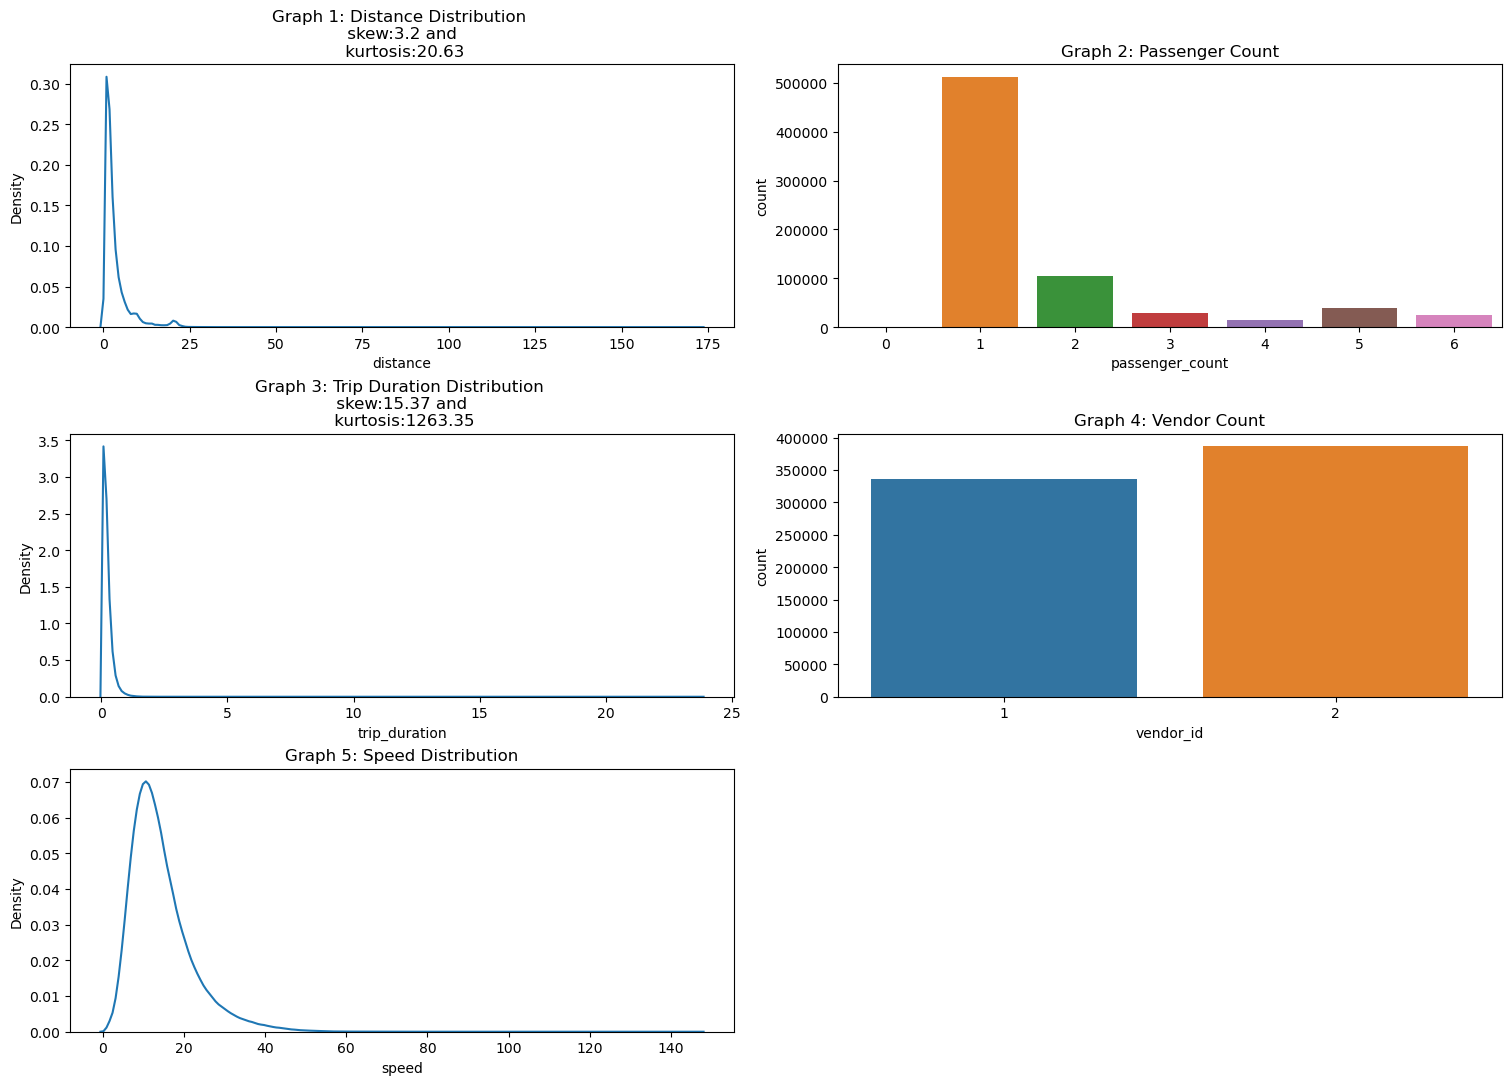

In [144]:
fig = plt.figure(figsize=(15, 16), constrained_layout=True)
spec = fig.add_gridspec(5, 2)
ax0 = fig.add_subplot(spec[0,0])
skew_data = taxi_trip_df[['distance','trip_duration']].skew()
kurt_data = taxi_trip_df[['distance','trip_duration']].kurtosis()
## Analyzing the distribution of the 'distance' variable
sns.kdeplot(x="distance",data=taxi_trip_df,ax=ax0).set(title = "Graph 1: Distance Distribution \n skew:{} and \n kurtosis:{}".format(skew_data['distance'].round(2),kurt_data['distance'].round(2)))
ax1 = fig.add_subplot(spec[0,1])
## Analyzing the Passenger count
sns.countplot(x="passenger_count",data=taxi_trip_df,ax=ax1).set(title = "Graph 2: Passenger Count")
ax2 = fig.add_subplot(spec[1,0])
## Analyzing the distribution of the target variable: trip_duration
sns.kdeplot(x="trip_duration",data=taxi_trip_df,ax=ax2).set(title = "Graph 3: Trip Duration Distribution \n skew:{} and \n kurtosis:{}".format(skew_data['trip_duration'].round(2),kurt_data['trip_duration'].round(2)))
ax3 = fig.add_subplot(spec[1,1])
## Analyzing the vendor count
sns.countplot(x="vendor_id",data=taxi_trip_df,ax=ax3).set(title = "Graph 4: Vendor Count")
ax4 = fig.add_subplot(spec[2,0])
## Analyzing the Speed Distribution
sns.kdeplot(x="speed",data=taxi_trip_df,ax=ax4).set(title = "Graph 5: Speed Distribution")
plt.show()

#### Insights
2. The graph 1 and graph 3 are right skewed. 
3. From Graph 2, it can be seen that in 71% of all the trips, the count of passengers travelling is 1.
4. From Graph 4, it can be seen that vendor with id 2 has taken more trips in comparison to vendor with id 1
5. The Graph 5(Speed distribution) is approximately normal.

## Replace outliers with min max value of the whisker

In [145]:
def replace_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_in.loc[df_in[col_name]>fence_high,col_name] = fence_high+1
    df_in.loc[df_in[col_name]<fence_low,col_name] = fence_low-1
    return df_in
copied_df = taxi_trip_df.copy()
replace_outlier(copied_df,'distance')
replace_outlier(copied_df,'trip_duration')



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,drop_day,drop_time,drop_month,pickup_hour,pickup_min,pickup_second,drop_hour,drop_min,drop_second,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,PM,2,16,40,21,16,47,1,10.795674
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,PM,3,23,35,37,23,53,57,13.485355
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,PM,2,17,59,33,18,26,48,15.960794
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,AM,1,9,44,31,10,3,32,7.443580
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,AM,2,6,42,23,6,56,31,18.329730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,...,Saturday,PM,5,13,29,38,13,34,34,13.652678
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,...,Monday,AM,2,0,43,11,0,48,26,8.275536
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,...,Friday,PM,4,18,56,48,19,8,1,12.285199
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,...,Sunday,AM,6,9,50,47,9,58,14,6.820842


[Text(0.5, 1.0, 'Graph 5: Distance distribution no outliers \n skew:1.29 and \n kurtosis:0.58')]

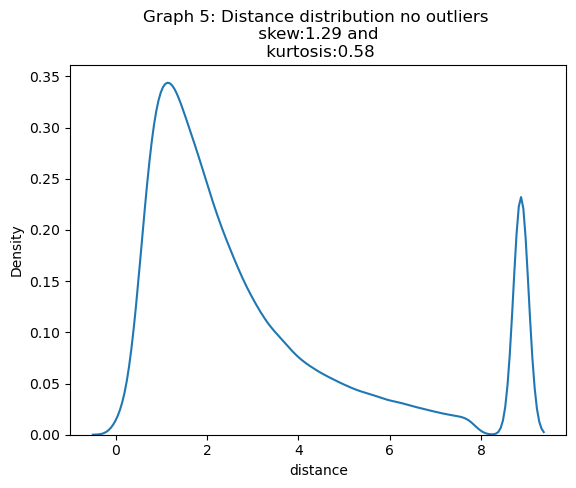

In [146]:
skew_dist = copied_df['distance'].skew().round(2)
kurt_dist = copied_df['distance'].kurtosis().round(2)
sns.kdeplot(x="distance",data=copied_df).set(title="Graph 5: Distance distribution no outliers \n skew:{} and \n kurtosis:{}".format(skew_dist,kurt_dist))

[Text(0.5, 1.0, 'Graph 6: Duration distribution no outliers \n skew:3.25 and \n kurtosis:10.43')]

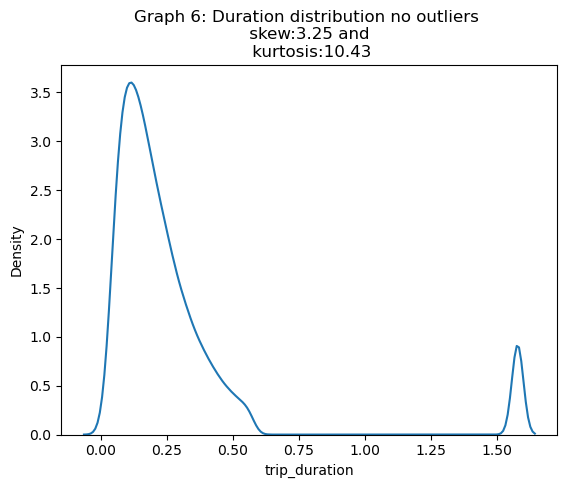

In [147]:
skew_dur = copied_df['trip_duration'].skew().round(2)
kurt_dur = copied_df['trip_duration'].kurtosis().round(2)
sns.kdeplot(x="trip_duration",data=copied_df).set(title="Graph 6: Duration distribution no outliers \n skew:{} and \n kurtosis:{}".format(skew_dur,kurt_dur))

#### The graph 5 and graph 6 are still right skewed

In [148]:
copied_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,pickup_month,pickup_year,pickup_date,drop_month,pickup_hour,pickup_min,pickup_second,drop_hour,drop_min,drop_second,speed
count,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.0,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.000000,722729.00000,722729.000000
mean,1.534642,1.661662,-73.973575,40.750946,-73.973464,40.751831,0.272359,3.020790,3.518237,2016.0,15.502720,3.518536,13.615578,29.598794,29.470348,13.611243,29.635603,29.50983,14.497546
std,0.498799,1.311766,0.037975,0.027948,0.035886,0.032234,0.323062,2.466318,1.680466,0.0,8.699479,1.680610,6.401537,17.332111,17.316400,6.484502,17.417826,17.32101,7.721406
min,1.000000,0.000000,-75.455917,39.803932,-74.775429,40.153744,0.001000,0.001061,1.000000,2016.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000118
25%,1.000000,1.000000,-73.991867,40.737385,-73.991318,40.735977,0.111000,1.248578,2.000000,2016.0,8.000000,2.000000,9.000000,15.000000,14.000000,9.000000,15.000000,15.00000,9.218742
50%,2.000000,1.000000,-73.981781,40.754101,-73.979782,40.754536,0.184000,2.111295,4.000000,2016.0,15.000000,4.000000,14.000000,30.000000,29.000000,14.000000,30.000000,30.00000,12.859786
75%,2.000000,2.000000,-73.967484,40.768311,-73.963150,40.769749,0.298000,3.896496,5.000000,2016.0,23.000000,5.000000,19.000000,45.000000,44.000000,19.000000,45.000000,45.00000,17.894932
max,2.000000,6.000000,-73.237999,41.319164,-72.711395,41.480755,1.578500,8.868374,6.000000,2016.0,31.000000,7.000000,23.000000,59.000000,59.000000,23.000000,59.000000,59.00000,146.450882


#### After replacing the outliers with min-max values of the whisker,there is significant decrease in the maximum values of "trip_duration" and "distance". The maximum value of trip_duration with outliers is 32328.93 and after replacing outlier it is 35.87.Similarly,the maximum value of "distance" with outliers is 1240.130000 and maximum value of "distance" without ouliers is 8.83.

#### The graph 5 and graph 6 are still highly skewed after replacing the outliers with the min-max whisker.

## Remove the ouliers and visualize the distributions

In [149]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df_nout = remove_outlier(taxi_trip_df,'distance')
df_nout = remove_outlier(df_nout,'trip_duration')

In [150]:
df_nout.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,pickup_month,pickup_year,pickup_date,drop_month,pickup_hour,pickup_min,pickup_second,drop_hour,drop_min,drop_second,speed
count,633927.000000,633927.000000,633927.000000,633927.000000,633927.000000,633927.000000,633927.000000,633927.000000,633927.000000,633927.0,633927.000000,633927.000000,633927.000000,633927.000000,633927.000000,633927.000000,633927.000000,633927.000000,633927.000000
mean,1.533404,1.657060,-73.979617,40.752975,-73.977723,40.753256,0.184067,2.317538,3.498266,2016.0,15.483635,3.498471,13.654782,29.648945,29.468223,13.656011,29.642222,29.519478,13.461495
std,0.498883,1.310168,0.021643,0.023490,0.023002,0.026104,0.104181,1.571643,1.678855,0.0,8.702834,1.678953,6.383817,17.326739,17.314531,6.449523,17.424459,17.318418,6.476795
min,1.000000,0.000000,-74.459015,40.413231,-74.459000,40.433281,0.001000,0.001061,1.000000,2016.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000118
25%,1.000000,1.000000,-73.992134,40.738686,-73.991600,40.738182,0.102000,1.162078,2.000000,2016.0,8.000000,2.000000,9.000000,15.000000,14.000000,9.000000,15.000000,15.000000,8.982411
50%,2.000000,1.000000,-73.982201,40.754341,-73.980721,40.754871,0.164000,1.866133,3.000000,2016.0,15.000000,3.000000,14.000000,30.000000,29.000000,14.000000,30.000000,30.000000,12.338807
75%,2.000000,2.000000,-73.969704,40.767735,-73.966522,40.769321,0.248000,3.034333,5.000000,2016.0,23.000000,5.000000,19.000000,45.000000,44.000000,19.000000,45.000000,45.000000,16.643565
max,2.000000,6.000000,-73.237999,41.216953,-73.225014,41.216946,0.491000,7.868324,6.000000,2016.0,31.000000,7.000000,23.000000,59.000000,59.000000,23.000000,59.000000,59.000000,146.450882


0.73 -0.1


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

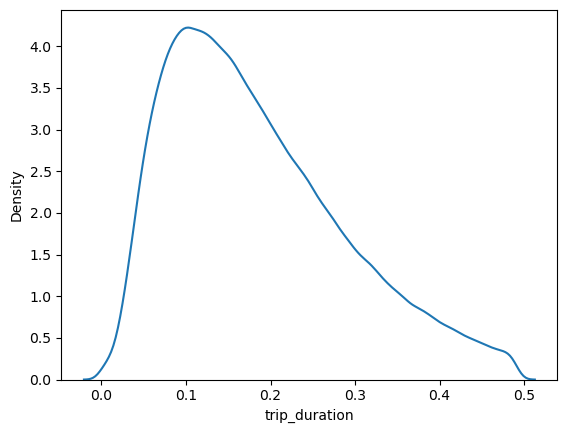

In [151]:
skew_re= df_nout['trip_duration'].skew().round(2)
kurt_re = df_nout['trip_duration'].kurtosis().round(2)
print(skew_re,kurt_re)
sns.kdeplot(x="trip_duration",data=df_nout)

1.26 1.17


<AxesSubplot:xlabel='distance', ylabel='Density'>

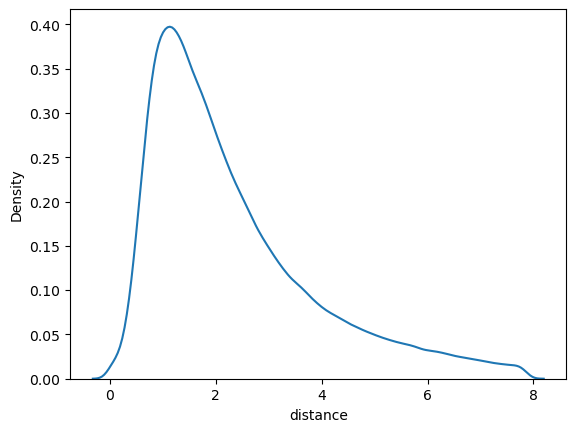

In [152]:
skew_dire= df_nout['distance'].skew().round(2)
kurt_dire = df_nout['distance'].kurtosis().round(2)
print(skew_dire,kurt_dire)
sns.kdeplot(x="distance",data=df_nout)

#### After removing the outlier, the trip duration distribution is moderately skewed. 

In [153]:
taxi_trip_df.select_dtypes(exclude=['int64','float64','Int64']).dtypes

id                            object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
store_and_fwd_flag            object
pickup_day                    object
pickup_time                   object
pickup_period                 object
weekend                         bool
drop_day                      object
drop_time                     object
dtype: object

## Univariate Analysis: Object

In [154]:
taxi_trip_df['store_and_fwd_flag'] = taxi_trip_df['store_and_fwd_flag'].map({'Y':1,'N':0})
norm_count_pickupday = taxi_trip_df['pickup_day'].value_counts(normalize=True)
norm_count_phour =  taxi_trip_df['pickup_time'].value_counts(normalize=True)
norm_count_pmonth = taxi_trip_df['pickup_month'].value_counts(normalize=True)
norm_count_pperiod = taxi_trip_df['pickup_period'].value_counts(normalize=True)

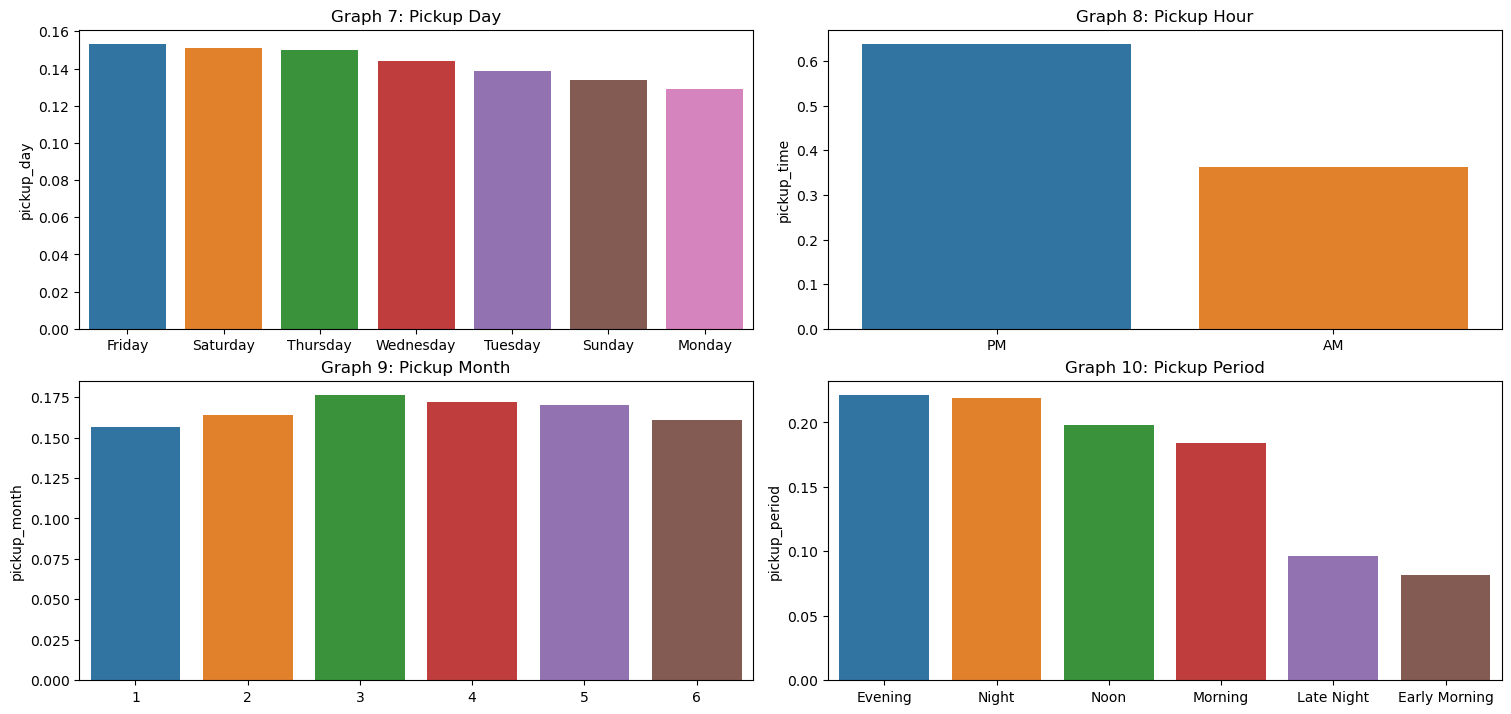

In [155]:
fig = plt.figure(figsize=(15, 16), constrained_layout=True)
spec = fig.add_gridspec(5, 2)
ax0 = fig.add_subplot(spec[0,0])
## Analyzing the distribution of the variable 'pickup_day'
sns.barplot(x=norm_count_pickupday.index,y= norm_count_pickupday,data=taxi_trip_df,ax=ax0).set(title='Graph 7: Pickup Day')
ax1 = fig.add_subplot(spec[0,1])
## Analyzing the distribution of the variable 'pickup_hour'
sns.barplot(x=norm_count_phour.index,y= norm_count_phour,data=taxi_trip_df,ax=ax1).set(title='Graph 8: Pickup Hour')
ax2 = fig.add_subplot(spec[1,0])
## Analyzing the distribution of the variable 'pickup_month'
sns.barplot(x=norm_count_pmonth.index,y= norm_count_pmonth,data=taxi_trip_df,ax=ax2).set(title='Graph 9: Pickup Month')
ax3 = fig.add_subplot(spec[1,1])
## Analyzing the distribution of the variable 'pickup_period'
sns.barplot(x=norm_count_pperiod.index,y= norm_count_pperiod,data=taxi_trip_df,ax=ax3).set(title='Graph 10: Pickup Period')
plt.show()

#### From Graph 7, it can be seen that there is no significant difference in the taxi pickup days. From Graph 8, it can be seen that 64% of taxi pickup is in the evening. From Graph 9, it can be seen that there is no significant difference in pickup months. From Graph 10, it can be seen that taxi pickup is the least in the early morning time. Only 8% of people are taking taxis early in the morning

## Summary Univariate
1. Distance traveled is 0.0 km for 3927 rows of the dataframe.On looking at the data, it seems that this is happening when pickup and drop coordinates are the same or when there is a very small difference between pickup longitude and pickup latitude. The same pickup longitude and latitude can be due to a round trip or the error made while entering the data. Dropped all the rows where the distance is less than or equal to 0.0 and trip_duration is 0.0.
2. We can remove 'id' column from our analysis as this column will not contribute in our analysis.
3. We can drop 'pickup_datetime' and 'dropoff_datetime' columns as we have extracted informtion from these variables.

## Bivariate Analysis : Numerical- Numerical

#### List of Hypothesis and investigation to perform under this combination.

1.  Is trip duration correlated with the distance between the locations?
2.  Does a vendor id affects the trip duration?

In [156]:
corr = taxi_trip_df.corr()
corr

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_month,...,pickup_date,weekend,drop_month,pickup_hour,pickup_min,pickup_second,drop_hour,drop_min,drop_second,speed
vendor_id,1.000000,0.286590,0.016860,0.004699,0.005633,0.006498,-0.079660,0.008883,0.008410,-0.005453,...,0.000599,0.002530,-0.005458,0.009488,0.000087,0.000512,0.009585,0.000344,0.000529,0.005101
passenger_count,0.286590,1.000000,0.002936,-0.004287,0.000539,-0.003337,-0.020804,0.013288,0.010117,-0.001768,...,0.001703,0.030354,-0.001800,0.009800,-0.000134,0.001696,0.009252,0.000063,0.001366,-0.003362
pickup_longitude,0.016860,0.002936,1.000000,-0.140813,0.256296,0.045950,0.020347,0.338261,0.512737,0.005775,...,-0.000626,-0.023056,0.005871,0.019882,-0.004955,0.002012,0.020661,-0.000376,-0.000149,0.298284
pickup_latitude,0.004699,-0.004287,-0.140813,1.000000,0.052582,0.418753,-0.010321,-0.225462,-0.320807,-0.001860,...,-0.006889,-0.040941,-0.001948,0.013296,0.001736,-0.000002,0.021091,0.002347,0.000182,-0.121072
dropoff_longitude,0.005633,0.000539,0.256296,0.052582,1.000000,0.134994,0.017592,0.210136,0.366976,0.006317,...,0.001115,-0.004044,0.006373,-0.042737,-0.005036,0.000971,-0.045022,-0.002054,0.000870,0.291865
dropoff_latitude,0.006498,-0.003337,0.045950,0.418753,0.134994,1.000000,-0.012165,-0.165117,-0.159730,-0.001684,...,-0.006413,-0.025377,-0.001734,0.015956,0.002393,0.000206,0.020207,0.000214,-0.000450,0.015489
store_and_fwd_flag,-0.079660,-0.020804,0.020347,-0.010321,0.017592,-0.012165,1.000000,0.027515,0.031876,0.000229,...,0.001666,-0.004424,0.000239,0.002062,0.000096,0.001782,0.002718,-0.000528,-0.000798,0.011133
trip_duration,0.008883,0.013288,0.338261,-0.225462,0.210136,-0.165117,0.027515,1.000000,0.718237,0.055014,...,0.009644,-0.058737,0.055184,0.025938,-0.008849,-0.000256,0.027942,-0.005614,-0.003740,0.050369
distance,0.008410,0.010117,0.512737,-0.320807,0.366976,-0.159730,0.031876,0.718237,1.000000,0.017831,...,0.006261,0.010933,0.018013,-0.019211,-0.008690,0.000540,-0.024536,-0.000832,-0.000391,0.555334
pickup_month,-0.005453,-0.001768,0.005775,-0.001860,0.006317,-0.001684,0.000229,0.055014,0.017831,1.000000,...,-0.015151,-0.008265,0.999947,-0.003410,-0.000413,0.000927,-0.004099,-0.001373,0.001111,-0.029218


/Users/monikasinghal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


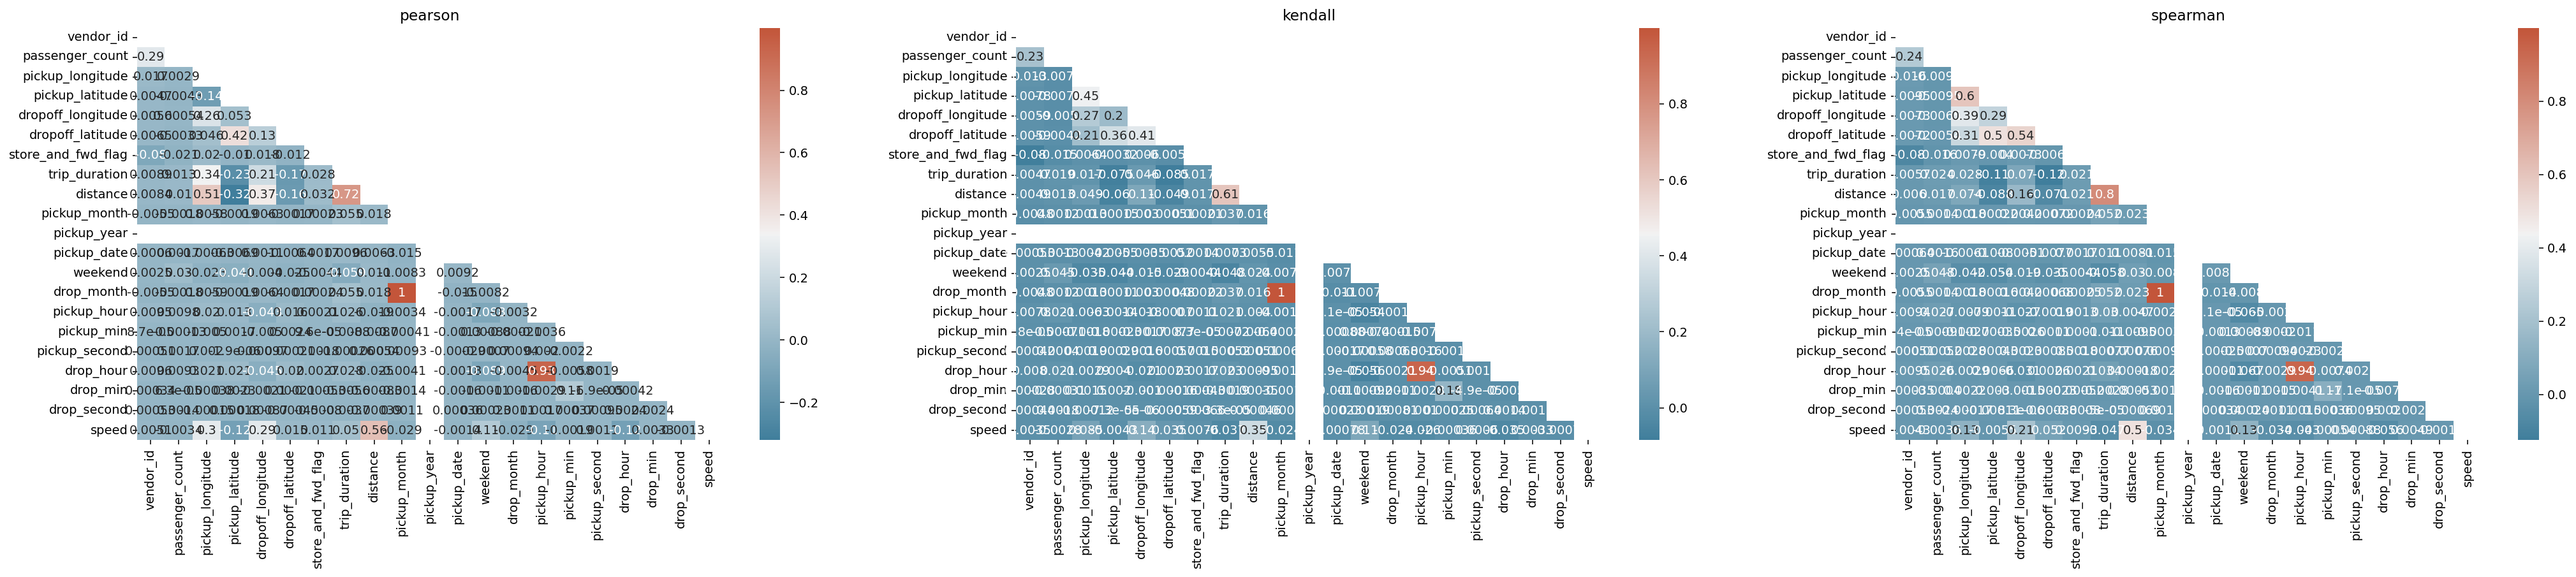

In [157]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation = taxi_trip_df.corr(method=i)
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap
    sns.heatmap(correlation, annot=True, mask = mask, cmap=cmap).set(title=i)

#### There is a strong correlation:0.79 between the variables 'distance' and 'trip_duration' on considering spearman correlation and 0.61 on considering kendall correlation.

In [158]:
log_distance = taxi_trip_df['distance'].map(lambda x: np.log(x))
log_duration = taxi_trip_df['trip_duration'].map(lambda x: np.log(x))

[Text(0.5, 1.0, 'Graph 11:Trip Duration vs distance')]

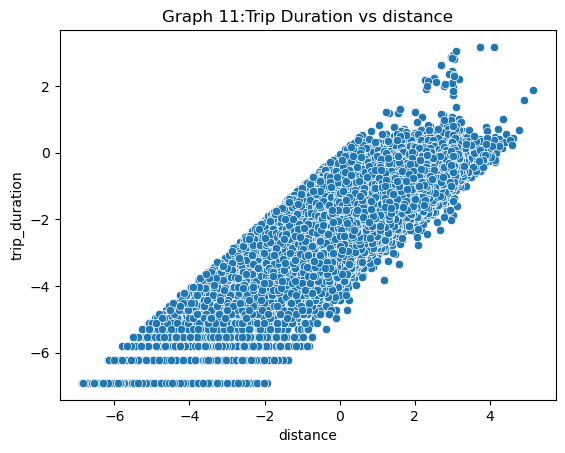

In [159]:
sns.scatterplot(x=log_distance,y=log_duration).set(title='Graph 11:Trip Duration vs distance')

[Text(0.5, 1.0, 'Graph 12:Trip Duration vs Vendor ID')]

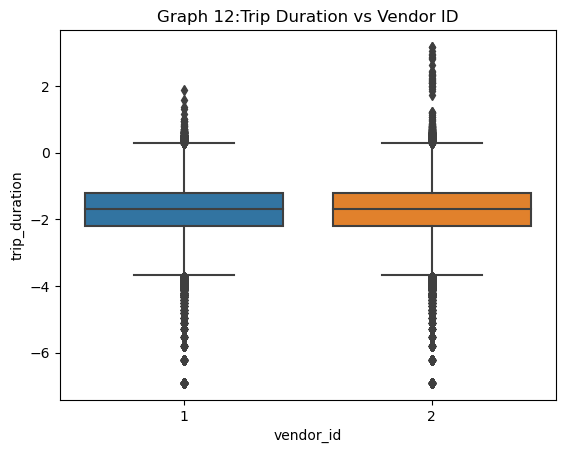

In [160]:
sns.boxplot(x=taxi_trip_df['vendor_id'],y=log_duration).set(title='Graph 12:Trip Duration vs Vendor ID')

### From Graph 11, it can be seen that trip duration is strongly correlated with distance. From Graph 12, it can be seen that vendor_id doesn't has an impact on trip duration

## Bivariate Analysis: Continuous-Categorical variables

#### List of Hypothesis and investigation to perform under this combination.

1.  Does the trip duration decrease on the weekend?
2.  Is trip duration affected by the time of the day?
3.  Does the day of the week affects the trip duration?
4.  Does the trip duration increase in the evening?
5.  Is the trip duration different for the different months?

In [161]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval


In [162]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [163]:
def plot_categories(category,title):
    #plotting
    plt.figure(figsize = (15,4), dpi=140)
    #barplot
    plt.subplot(1,2,1)
    sns.boxplot(x=category,y='trip_duration',data= df_nout)
    plt.subplot(1,2,2)
    sns.barplot(x=category,y='trip_duration',data= df_nout)
    plt.suptitle(title)
    plt.show()

In [164]:
def plot_two_categories(category,title):
    group_df = df_nout.groupby(category).trip_duration.agg(['count','mean','std']).reset_index()
    print(group_df)
    n1, n2 = group_df.iloc[0,1], group_df.iloc[1,1]
    m1, m2 = group_df.iloc[0,2], group_df.iloc[1,2]
    std1, std2 = group_df.iloc[0,3],group_df.iloc[1,3]
    #calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)
    title = title + '\n t-test p-value = {}  and z-test p-value = {}'.format(t_p_val,
                                                                z_p_val)
    plot_categories(category,title)
    

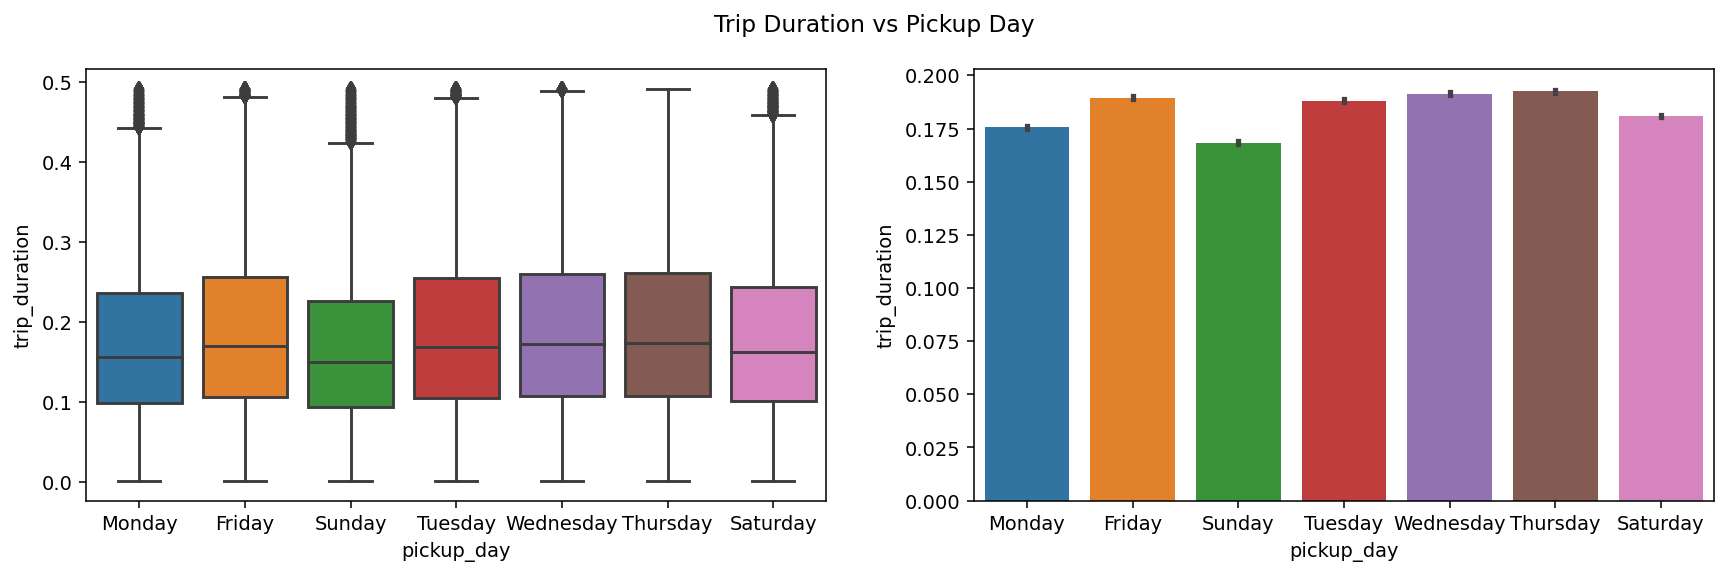

In [165]:
plot_categories('pickup_day','Trip Duration vs Pickup Day')

#### The trip duration is minimum on Sunday.

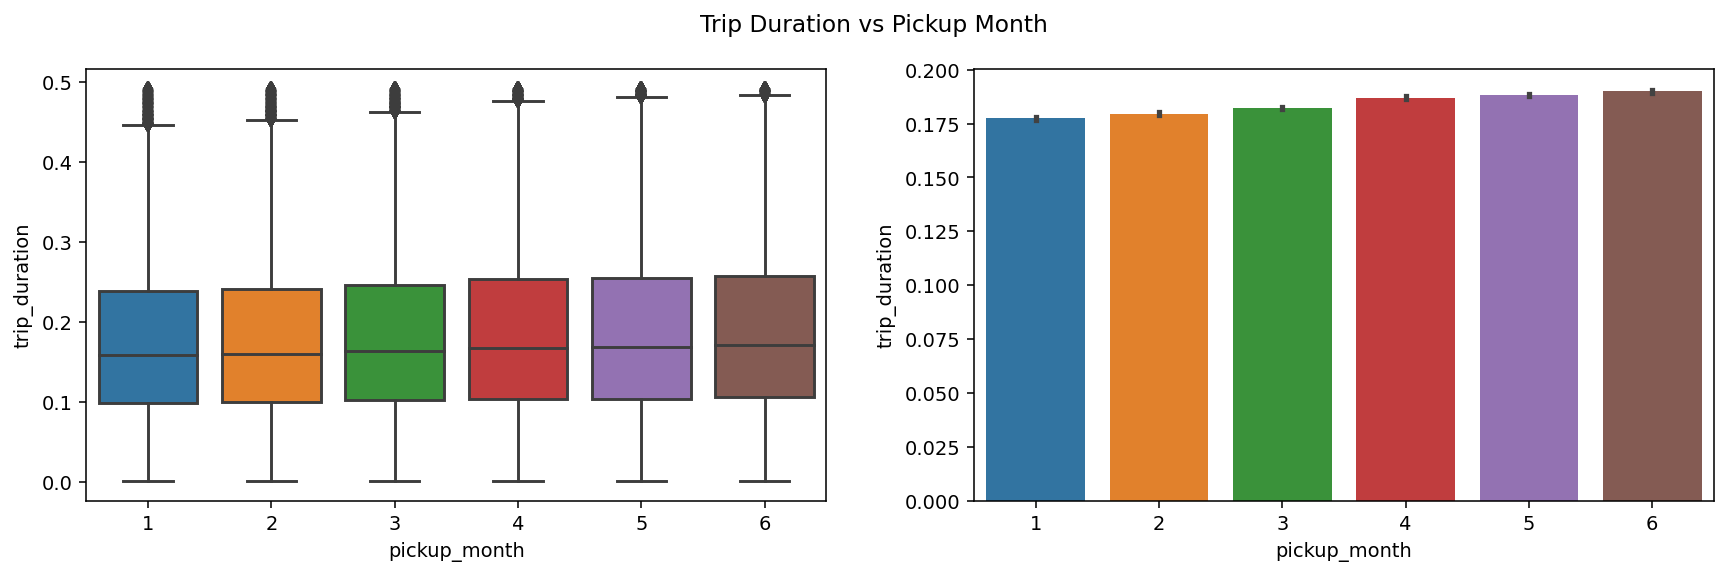

In [166]:
plot_categories('pickup_month','Trip Duration vs Pickup Month')

#### Trip duration is similar for the different months

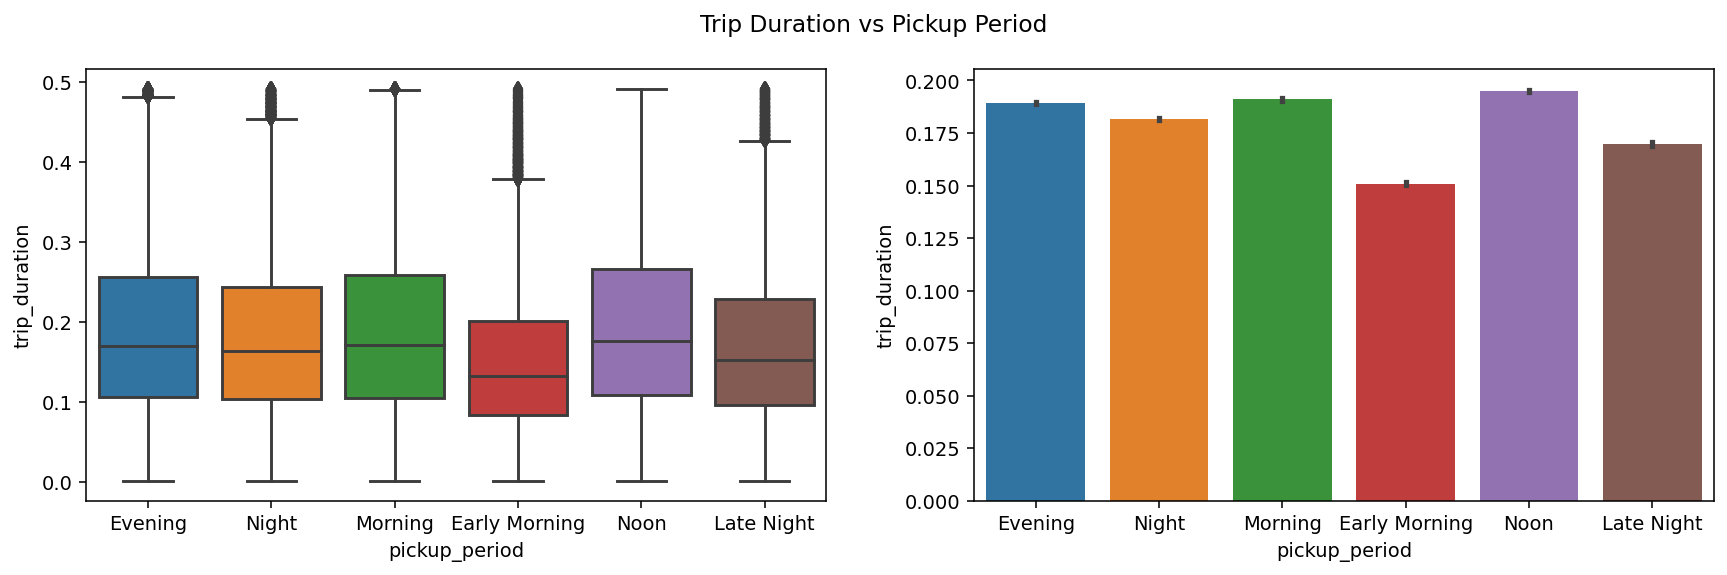

In [167]:
plot_categories('pickup_period','Trip Duration vs Pickup Period')

#### Trip duration is minimum in the early morning.

  pickup_time   count      mean       std
0          AM  229281  0.176539  0.102461
1          PM  404646  0.188332  0.104904


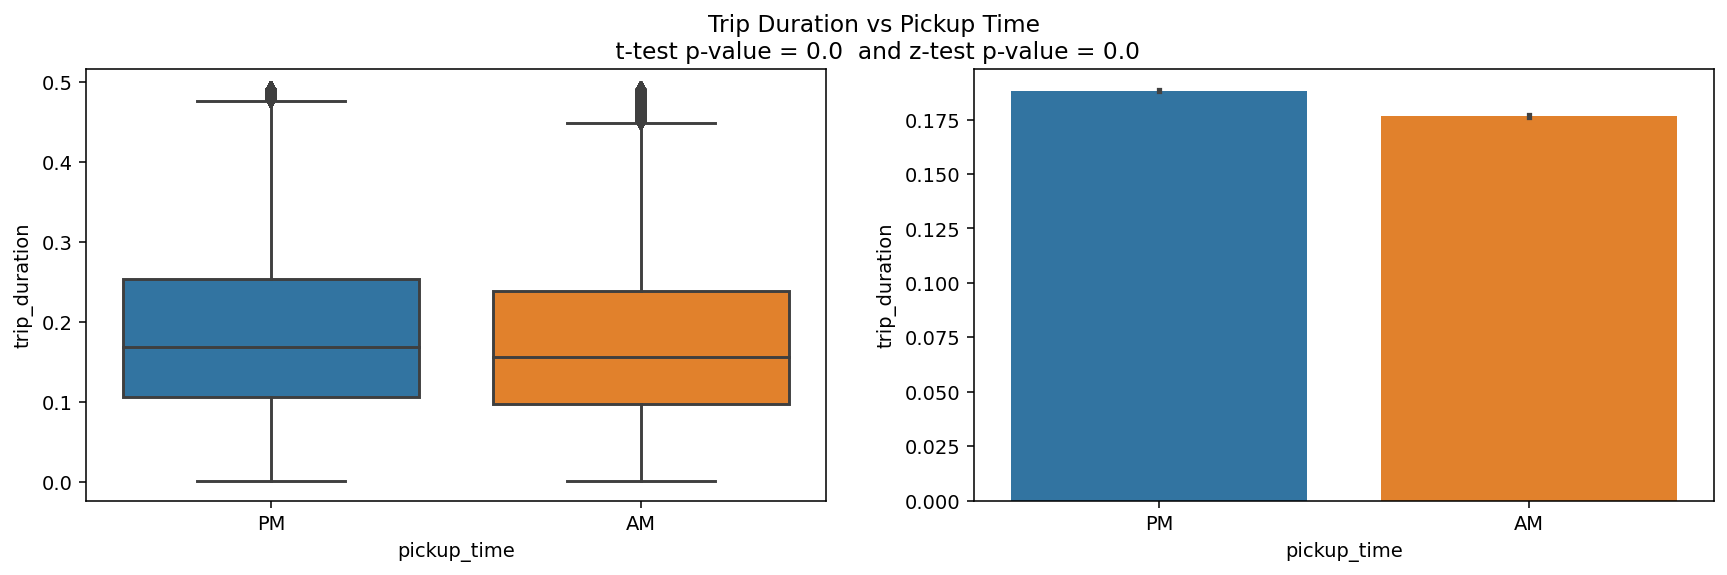

In [168]:
plot_two_categories('pickup_time','Trip Duration vs Pickup Time')

#### Ha: Evening trip_duration > Morning trip_duration
#### Hnull : Evening trip_duration <= Morning trip_duration
#### The p-value is 0.0 which is less than 0.05 and hence statistically significant. We can reject the null hypothesis and accept the alternate hypothesis. Hence, we can say that trip duration increases in the evening.

   weekend   count      mean       std
0    False  450497  0.187712  0.105699
1     True  183430  0.175113  0.099793


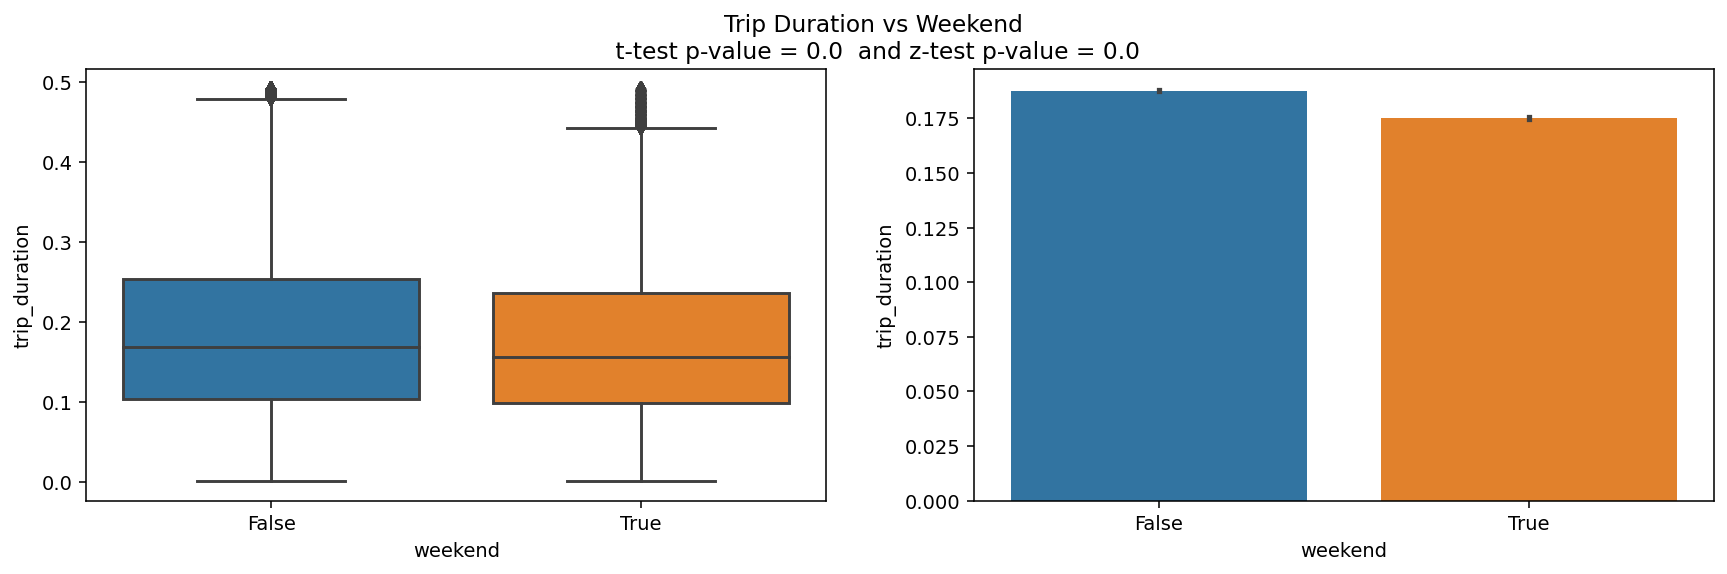

In [169]:
plot_two_categories('weekend','Trip Duration vs Weekend')

#### Ha: Weekend trip_duration < Weekdays trip_duration
#### Hnull : Weekend trip_duration >= Weekdays trip_duration 
#### The p-value is 0.0 which is less than 0.05 and hence statistically significant. We can reject the null hypothesis and accept the alternate hypothesis. Hence, we can say that trip duration decreases on the weekend.

## Multivariate Analysis

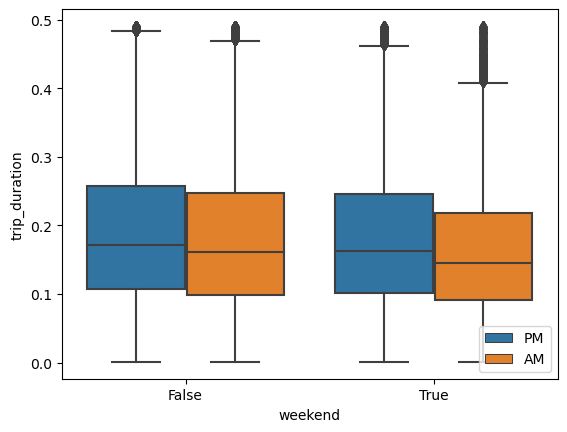

In [170]:
sns.boxplot(x='weekend',y='trip_duration',hue='pickup_time', data=df_nout)
plt.legend(loc='lower right')
plt.show()

#### The trip duration is less in the morning hours for both weekend and weekdays.

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

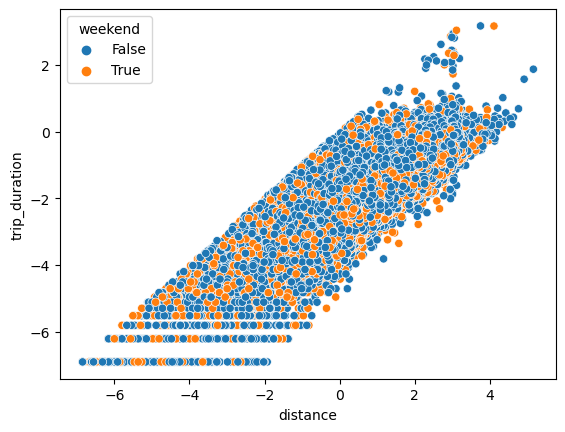

In [171]:
sns.scatterplot(x=log_distance,y= log_duration,hue=taxi_trip_df['weekend'])

<AxesSubplot:xlabel='speed', ylabel='trip_duration'>

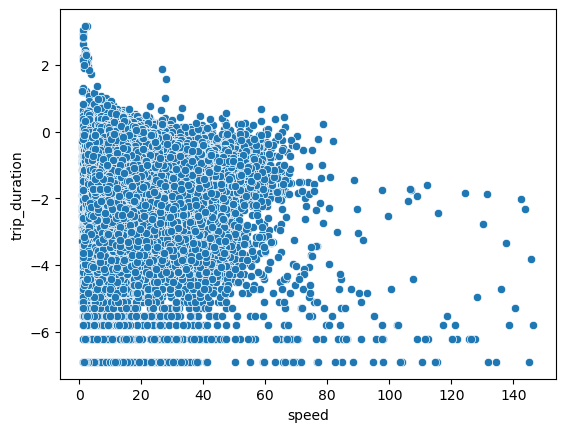

In [172]:
sns.scatterplot(x=taxi_trip_df['speed'],y=log_duration)

#### The trip duration is correlated with the distance.Can't see the same trend for all three variables due to many points in the scatter plot.

## EDA Summary

##### 1. The trip duration is highly correlated with distance.
##### 2. The trip duration decreases on the weekend.
##### 3. The trip duration increases in the evening hours.
##### 4. The trip duration is minimum on Sunday.
##### 5. The trip duration is minimum in the early morning
##### 6. The distance distribution is highly skewed.
##### 7. The 'id' column can be dropped as they will not contribute in the analysis
##### 8. The 'pickup_datetime' and 'dropoff_datetime'columns can be deleted as we have extracted information from these columns and they are no longer required.


# Feature Preprocessing 

#### Dropping the columns 'id', 'pickup_datetime','dropoff_datetime'as per the EDA

In [173]:
taxi_trip_df = taxi_trip_df.drop(['id','pickup_datetime','dropoff_datetime'],axis = 1)
taxi_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722729 entries, 0 to 729321
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   vendor_id           722729 non-null  int64  
 1   passenger_count     722729 non-null  int64  
 2   pickup_longitude    722729 non-null  float64
 3   pickup_latitude     722729 non-null  float64
 4   dropoff_longitude   722729 non-null  float64
 5   dropoff_latitude    722729 non-null  float64
 6   store_and_fwd_flag  722729 non-null  int64  
 7   trip_duration       722729 non-null  float64
 8   distance            722729 non-null  float64
 9   pickup_day          722729 non-null  object 
 10  pickup_time         722729 non-null  object 
 11  pickup_month        722729 non-null  int64  
 12  pickup_year         722729 non-null  int64  
 13  pickup_period       722729 non-null  object 
 14  pickup_date         722729 non-null  int64  
 15  weekend             722729 non-nul

#### Transforming the object variables

In [174]:
taxi_trip_df.select_dtypes(include='object')

,pickup_day,pickup_time,pickup_period,drop_day,drop_time
0,Monday,PM,Evening,Monday,PM
1,Friday,PM,Night,Friday,PM
2,Sunday,PM,Evening,Sunday,PM
3,Tuesday,AM,Morning,Tuesday,AM
4,Wednesday,AM,Early Morning,Wednesday,AM
...,...,...,...,...,...
729317,Saturday,PM,Noon,Saturday,PM
729318,Monday,AM,Late Night,Monday,AM
729319,Friday,PM,Evening,Friday,PM
729320,Sunday,AM,Morning,Sunday,AM


In [175]:
def encode_day_of_week(day_of_week: str) -> int:
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return days.index(day_of_week)

In [176]:
taxi_trip_df['pickup_day'] = taxi_trip_df['pickup_day'].map(encode_day_of_week)
taxi_trip_df['drop_day'] = taxi_trip_df['drop_day'].map(encode_day_of_week)
taxi_trip_df['pickup_period'] = taxi_trip_df['pickup_period'].map({'Late Night':1,
                      'Early Morning':2,
                      'Morning':3,
                      'Noon':4,
                      'Evening':5,
                      'Night':6})

#### Convert Boolean to integer types

In [177]:
taxi_trip_df['weekend'] = taxi_trip_df['weekend'].astype('int')

In [178]:
taxi_trip_df = pd.get_dummies(taxi_trip_df,columns=['pickup_time','drop_time'])

taxi_trip_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day,...,pickup_min,pickup_second,drop_hour,drop_min,drop_second,speed,pickup_time_AM,pickup_time_PM,drop_time_AM,drop_time_PM
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,0.111,1.198320,0,...,40,21,16,47,1,10.795674,0,1,0,1
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,0.306,4.126519,4,...,35,37,23,53,57,13.485355,0,1,0,1
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,0.454,7.246201,6,...,59,33,18,26,48,15.960794,0,1,0,1
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,0.317,2.359615,1,...,44,31,10,3,32,7.443580,1,0,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,0.236,4.325816,2,...,42,23,6,56,31,18.329730,1,0,1,0


## Building the Model

#### Standard Scaling is a necessity for Linear Models. Distance variable is highly skewed. I will go ahead and take the log transformation of the distance variable and then scale all the columns.

In [179]:
taxi_trip_df['log_distance'] = taxi_trip_df['distance'].map(lambda x: np.log(x))

In [180]:
X= taxi_trip_df.drop(['trip_duration','pickup_time_PM','drop_time_PM','distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','drop_month'],axis = 1)
y = taxi_trip_df['trip_duration']

In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722729 entries, 0 to 729321
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   vendor_id           722729 non-null  int64  
 1   passenger_count     722729 non-null  int64  
 2   store_and_fwd_flag  722729 non-null  int64  
 3   pickup_day          722729 non-null  int64  
 4   pickup_month        722729 non-null  int64  
 5   pickup_year         722729 non-null  int64  
 6   pickup_period       722729 non-null  int64  
 7   pickup_date         722729 non-null  int64  
 8   weekend             722729 non-null  int64  
 9   drop_day            722729 non-null  int64  
 10  pickup_hour         722729 non-null  int64  
 11  pickup_min          722729 non-null  int64  
 12  pickup_second       722729 non-null  int64  
 13  drop_hour           722729 non-null  int64  
 14  drop_min            722729 non-null  int64  
 15  drop_second         722729 non-nul

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.30)

# Fit the scaler to the data
scaler.fit(X_train)

# Transform the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Method 1: Fit the Linear Model

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Create the model
model_linReg = LinearRegression()


# Fit the model
model_linReg.fit(X_train_scaled, y_train)
y_pred_linReg = model_linReg.predict(X_test_scaled)


r2_score_linReg = r2_score(y_test, y_pred_linReg)
mse_linReg = mean_squared_error(y_test,y_pred_linReg)


print(f"The R2 score for linear regression model is : {r2_score_linReg} and the mean squared error is :{mse_linReg}")

The R2 score for linear regression model is : 0.5630326548423974 and the mean squared error is :0.018755939800159487


In [184]:
X.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'pickup_day',
       'pickup_month', 'pickup_year', 'pickup_period', 'pickup_date',
       'weekend', 'drop_day', 'pickup_hour', 'pickup_min', 'pickup_second',
       'drop_hour', 'drop_min', 'drop_second', 'speed', 'pickup_time_AM',
       'drop_time_AM', 'log_distance'],
      dtype='object')

In [185]:
print(model_linReg.coef_)

[ 8.16576867e-04  5.07164160e-04  2.43306152e-03 -6.35835176e-04
  5.00519219e-03  0.00000000e+00 -5.06290283e-03  4.49981452e-04
 -9.46120894e-03  3.60328681e-03 -3.98323243e-03 -1.90025331e-04
 -1.31499511e-04 -1.80831618e-03 -8.82018507e-04 -7.53309447e-04
 -8.14583797e-02 -2.38274591e-03 -8.97106705e-03  1.79215803e-01]


In [186]:
coef_df = pd.DataFrame(data = {'feature':X.columns,'coef':model_linReg.coef_})
coef_df.sort_values(by='coef')

,feature,coef
16,speed,-0.081458
8,weekend,-0.009461
18,drop_time_AM,-0.008971
6,pickup_period,-0.005063
10,pickup_hour,-0.003983
17,pickup_time_AM,-0.002383
13,drop_hour,-0.001808
14,drop_min,-0.000882
15,drop_second,-0.000753
3,pickup_day,-0.000636


## Improving the score of the Linear Model

## Low Variance Filter

In [187]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_train_lowVariance = selector.fit_transform(X_train_scaled)
X_test_lowVariance = selector.fit_transform(X_test_scaled)
print(X_train_scaled.shape, X_train_lowVariance.shape)
print(X_test_scaled.shape , X_test_lowVariance.shape)



(505910, 20) (505910, 19)
(216819, 20) (216819, 19)


In [188]:
model_linReg.fit(X_train_lowVariance, y_train)
y_pred_lv= model_linReg.predict(X_test_lowVariance)


r2_score_lv = r2_score(y_test, y_pred_lv)
mse_lv = mean_squared_error(y_test,y_pred_lv)
print(f"The R2 score for linear regression model after low variance filter is : {r2_score_lv} and the mean squared error is :{mse_lv}")


The R2 score for linear regression model after low variance filter is : 0.5630326548423973 and the mean squared error is :0.01875593980015949


## Reverse Feature Elimination

In [189]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
rfe = RFE(estimator=model_linReg, n_features_to_select=1,verbose=2)
rfe.fit(X_train_scaled, y_train)
rank_df = pd.DataFrame(data = {'feature':X.columns,'rank':rfe.ranking_})
print(rank_df.sort_values(by='rank'))
index_rank = rank_df['feature'][rank_df['rank']<15].index
print(index_rank)


Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
               feature  rank
19        log_distance     1
16               speed     2
18        drop_time_AM     3
10         pickup_hour     4
8              weekend     5
4         pickup_month     6
6        pickup_period     7
17      pickup_time_AM     8
9             drop_day     9
2   store_and_fwd_flag    10
13   

In [190]:
print(X_train_scaled[:,index_rank].shape,X_train_scaled.shape)
model_linReg.fit(X_train_scaled[:,index_rank],y_train)
y_pred_rfe = model_linReg.predict(X_test_scaled[:,index_rank])
r2_score_rfe = r2_score(y_test, y_pred_rfe)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
print(f"The score for linear regression model with RFE is : {r2_score_rfe} and the mean squared error is :{mse_rfe}")

(505910, 14) (505910, 20)
The score for linear regression model with RFE is : 0.563022782044674 and the mean squared error is :0.018756363570040256


## Method 2: Random Forest Regressor

In [191]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor object
regressor = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1,verbose=3,n_jobs=4)

In [192]:
X_train.shape

(505910, 20)

In [193]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   31.1s


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomForestRegressor(max_depth=20, n_jobs=4, verbose=3)

In [194]:
# Make predictions on the test set
y_pred_randomForest = regressor.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred_randomForest))
r2_score_ranF = r2_score(y_test, y_pred_randomForest)
mse_ranF = mean_squared_error(y_test, y_pred_randomForest)

print(f"The score for RandomForestRegressor is : {r2_score_ranF} the mean squared error is :{mse_ranF} and the root mean squared error is {rmse}")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.9s


The score for RandomForestRegressor is : 0.9637849038043719 the mean squared error is :0.0015544597820168894 and the root mean squared error is 0.03942663797506566


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.4s finished


## Method 3: XGB Regressor With Grid Search CV

In [195]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Create the model
model_xgb = xgb.XGBRegressor(random_state=42,verbosity=3,n_jobs=4)

# Define the hyperparameter grid
param_grid_xgb = {'max_depth': [20],
                    'n_estimators': [100],
                    'gamma':[0.1],
                    'learning_rate':[0.01]}

# Create the grid search object
grid_search_xgb = GridSearchCV(estimator = model_xgb, 
                           param_grid = param_grid_xgb, 
                           scoring=["r2","neg_root_mean_squared_error"],
                           refit="r2",
                           cv=5)

# Fit the model to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator = grid_search_xgb.best_estimator_

# Make predictions on the test data
y_pred_xgb = best_estimator.predict(X_test)
r2_score_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"The score for XGBoost Regression model is :{r2_score_xgb} and the mean squared error is : {mse_xgb}")



[10:31:55] DEBUG: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/gbm/gbtree.cc:157: Using tree method: 2
[10:31:56] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 1026 extra nodes, 4112 pruned nodes, max_depth=12
[10:31:56] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 1034 extra nodes, 4100 pruned nodes, max_depth=12
[10:31:57] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 1024 extra nodes, 4154 pruned nodes, max_depth=12
[10:31:57] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 1016 extra nodes, 4200 pruned nod


## Forward Selector with Random Forest Regressor


In [196]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

# Create the Sequential Feature Selector object
sfs = SequentialFeatureSelector(RandomForestRegressor(n_estimators=100), 
                                k_features=6,
                                scoring='neg_mean_squared_error',
                                cv=5,verbose=3,n_jobs=4)

# Fit the SFS to the training data
sfs.fit(X_train, y_train)

# Get the best set of features
best_features = list(sfs.k_feature_names_)
print(best_features)

# Get the model with the best set of features
model = sfs.estimator

# Make predictions on the test set
X_train_transf = sfs.transform(X_train)
X_test_transf = sfs.transform(X_test)
model.fit(X_train_transf,y_train)
y_pred_sfs = model.predict(X_test_transf)

# Calculate the root mean squared error of the predictions
rmse_sfs = np.sqrt(mean_squared_error(y_test, y_pred_sfs))
r2_score_sfs = r2_score(y_test, y_pred_sfs)
mse_sfs = mean_squared_error(y_test, y_pred_sfs)

print(f"The score for Random Forest Regressor with SequentialFeatureSelector is : {r2_score_sfs} the mean squared error is :{mse_sfs} and the root mean squared error is {rmse_sfs}")



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed: 17.9min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed: 17.9min remaining:    0.0s

[2023-01-13 10:56:53] Features: 1/6 -- score: -0.024526201012870674[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed: 77.3min finished
[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed: 77.3min remaining:    0.0s

[2023-01-13 12:14:09] Features: 2/6 -- score: -0.0007554628308438262[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 144.3min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 144.3min finished

[2023-01-13 14:38:29] Features: 3/6 -- score: -0.0006749413592577732[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.

STOPPING EARLY DUE TO KEYBOARD INTERRUPT.

TypeError: 'NoneType' object is not iterable